In [1]:
import os
current_path = os.getcwd()
folder = "MA"
path =  folder.join(current_path.split(folder)[:-1])+folder
os.chdir(path)

folderpath = "notebooks"

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
r1 = pd.read_csv(f'{folderpath}/500_UCR_Anomaly_robotDOG1_10000_19280_19360.txt',header=None,names=[0])
r2 = pd.read_csv(f'{folderpath}/501_UCR_Anomaly_robotDOG2_4000_11100_11200.txt',header=None,names=[1])
r3 = pd.read_csv(f'{folderpath}/503_UCR_Anomaly_robotDOG3_5300_11100_11200.txt',header=None,names=[2])

R = pd.concat([r1.iloc[:11100],r2.iloc[:11100 ],r3.iloc[:11100]],ignore_index=True,axis=1)

eyyyy


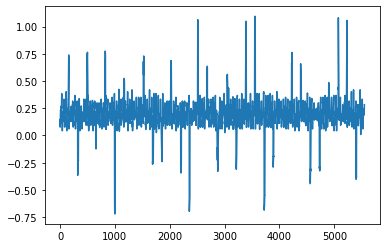

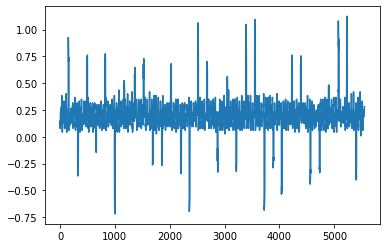

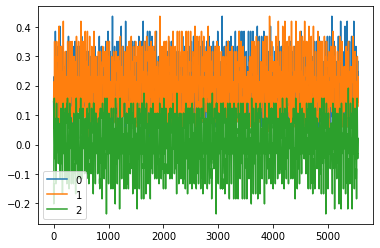

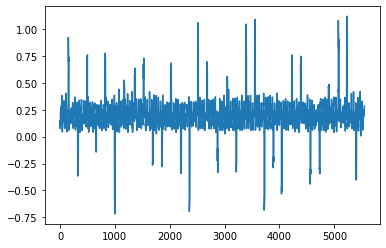

In [9]:


from Scenarios.scenario_types.BaseScenario import BaseScenario
from Repair.Robust_PCA.RPCAestimation.Robust_PCA_repair import RPCA_repair



R.corr() #low correlation


scen = BaseScenario(R)
injected = scen.train["injected"]
truth = scen.train["original"]

injected.iloc[:,0] = injected.iloc[:,0] 
truth.iloc[:,0] =  truth.iloc[:,0] 


repair_output =  RPCA_repair(injected,cols=[0],n_components=1,threshold=0.2)
repair = repair_output["repair"]
injected_col , repair_row = injected.iloc[:,0] , repair.iloc[:,0]
plt.show()
repair_row.plot()
plt.show()
injected_col.plot()
plt.show()
truth.plot()
plt.show()

plt.plot(repair_output["reduced"][:,0])


In [10]:
repair_output

{'repair':              0         1         2
 0     0.145299  0.145299 -0.133333
 1     0.128205  0.179487 -0.167521
 2     0.094017  0.196581 -0.201709
 3     0.076923  0.196581 -0.116239
 4     0.111111  0.196581 -0.013675
 ...        ...       ...       ...
 5545  0.247863  0.230769 -0.013675
 5546  0.230769  0.230769  0.003419
 5547  0.247863  0.213675  0.020513
 5548  0.247863  0.162393  0.020513
 5549  0.282051  0.145299  0.020513
 
 [5550 rows x 3 columns],
 'runtime': 3.2115745544433594,
 'n_components': 1,
 'reduced': array([[0.14714483, 0.19080332, 0.00362451],
        [0.12714495, 0.19233435, 0.00338537],
        [0.09145384, 0.19506658, 0.00295861],
        ...,
        [0.24572228, 0.18325702, 0.00480321],
        [0.24962459, 0.18295829, 0.00484987],
        [0.28490936, 0.18025717, 0.00527178]]),
 'threshold': 0.2,
 'C': array([[ 0.99701186, -0.07632324,  0.01192137]]),
 'type': 'RPCA',
 'name': 'RPCA(1,0.2,TruncatedSVD)'}

In [11]:
repair_output["C"]


array([[ 0.99701186, -0.07632324,  0.01192137]])

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(injected_col , truth.iloc[:,0])


0.01990319370227213

In [13]:
mean_squared_error(truth.iloc[:,0] , repair_row)


0.01805670102240484